<a href="https://colab.research.google.com/github/H3nr1que26/Pedro/blob/main/IA_ML_Analise_de_Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Inteligência Artificial**

## **Autor**

Professor: **Cristóvão José Dias da Cunha**

E-mail: **cristovao.cunha@gmail.com**

Site: [https://www.feg.unesp.br/cristovao](https://www.feg.unesp.br/cristovao)

Youtube: [https://www.youtube.com/channel/UCTwTFh0fSihjozAQ6qkL40Q](https://www.youtube.com/channel/UCTwTFh0fSihjozAQ6qkL40Q)

## **Sobre**

Serão estudadas:


*   Técnicas de limpeza de dados
  * Remoção de colunas não utilizadas
  * Recodificação de colunas categóricas em numéricas
  * Remoção de valores vazios 

*   Divisão dos dados em treino e teste
*   Aplicação de algoritmos de aprendizado de máquina supervisionados para problemas de classificação
  * Algoritmos lineares
  * Algoritmos não-lineares
  * Algoritmos não-lineares complexos
* Análise de métricas
  * Acurácia
  * Precisão
  * Sensibilidade
  * Matriz de confusão
  * Curva ROC e AUC
  * Curva de Precisão e Sensibilidade
  * Correlação 





# **Previsão de Empréstimos**
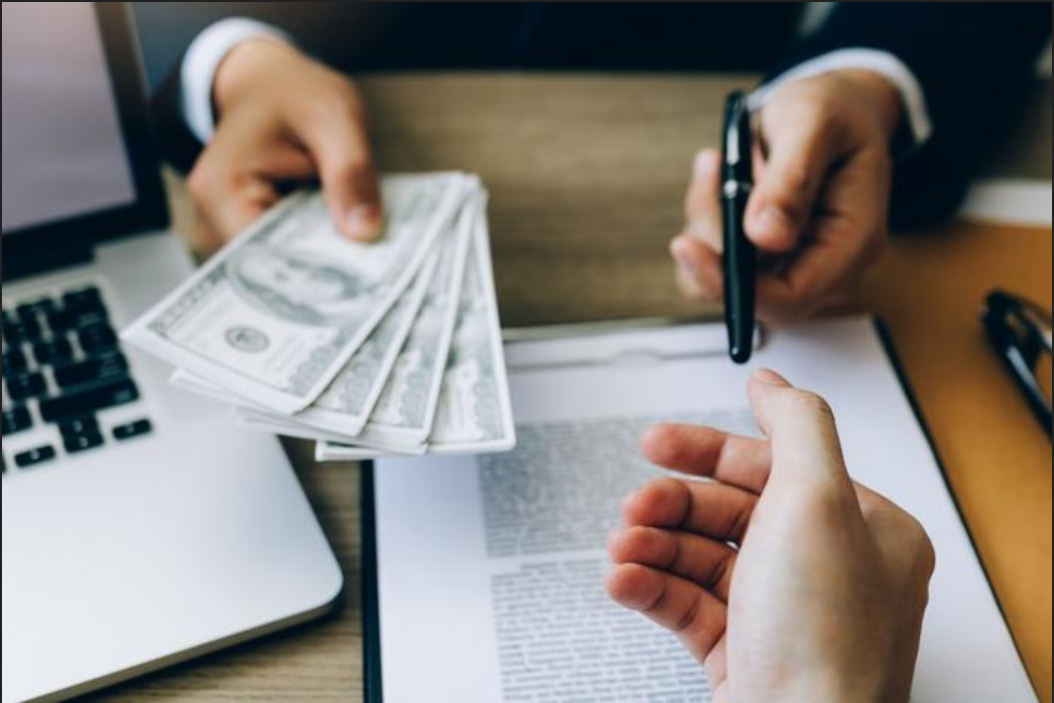

A empresa deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento do formulário de inscrição online.

Esses detalhes são gênero, estado civil, educação, número de dependentes, renda, valor do empréstimo, histórico de crédito e outros.

Dadas as informações, temos que prever se eles pagarão o empréstimo ou não.

## Importação das bibliotecas

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

## Funções auxiliares

Função para colorir os resultados da tabela de correlação, colocando em vermelho, onde o valor de correlação seja maior ou igual que 0.6 ou menor ou igual que -0.6.

Forma de usar:

`df.corr().style.applymap(color_corr)`

In [3]:
def color_corr ( value_str ):
  try:
    value = float(value_str)
    if value >= 0.6 or value <= -0.6:
      color = 'red'
    else:
      color = 'black'
  except:
          color = 'black'
  return 'color: %s' % color

## Importação dos dados

**Loan = Empréstimo**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
status_valores = df['Loan_Status'].drop_duplicates()
status_valores

0    Y
1    N
Name: Loan_Status, dtype: object

In [6]:
status_quantidades = df['Loan_Status'].value_counts()
status_quantidades

Y    422
N    192
Name: Loan_Status, dtype: int64

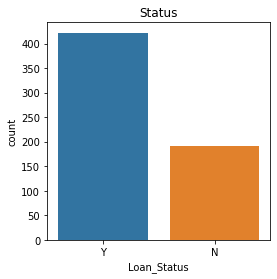

In [7]:
plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status', data=df )
plt.title('Status')
plt.show()

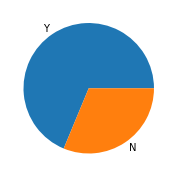

In [8]:
status_valores = list(status_valores)
status_quantidades = list(status_quantidades)
fig = plt.figure(figsize = (3, 3)) 
plt.pie(status_quantidades, labels = status_valores) 
plt.show() 

In [9]:
total = sum(status_quantidades)
for i, classe in enumerate(status_valores):
  print(classe, '(', status_quantidades[i], ')', status_quantidades[i]/total*100 )
print('Total:', total)

Y ( 422 ) 68.72964169381108
N ( 192 ) 31.27035830618892
Total: 614


## Recodificando a coluna Loan_Status para número

Qualquer uma das formas resulta na mesma coisa

In [10]:
#df['Loan_Status'].replace( {'Y':1, 'N':0}, inplace=True)
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1, 0)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Separar em Treino e Teste

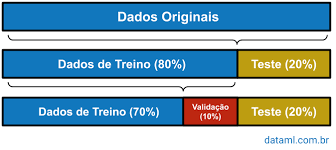

In [12]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1


In [14]:
train['Loan_Status'].value_counts()

1    332
0    159
Name: Loan_Status, dtype: int64

In [15]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,1
52,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,1
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,1


In [16]:
test['Loan_Status'].value_counts()

1    90
0    33
Name: Loan_Status, dtype: int64

## Retirar colunas que não usaremos

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="400" height="200"/>

Drop sem reatribuir ao próprio DataFrame (train) ou usar o inplace=True, é somente uma "consulta" de como ficará

In [17]:
train.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
359,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,1
192,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,0


In [18]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,LP002729,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1


Para efetivar a remoção da coluna Load_ID, pode fazer das duas formas:

In [19]:
train = train.drop(['Loan_ID'],axis=1)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [20]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,1
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban,0
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,0
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,1


In [21]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,1
52,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
536,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,1
469,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
55,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,1


## Valor Vazio

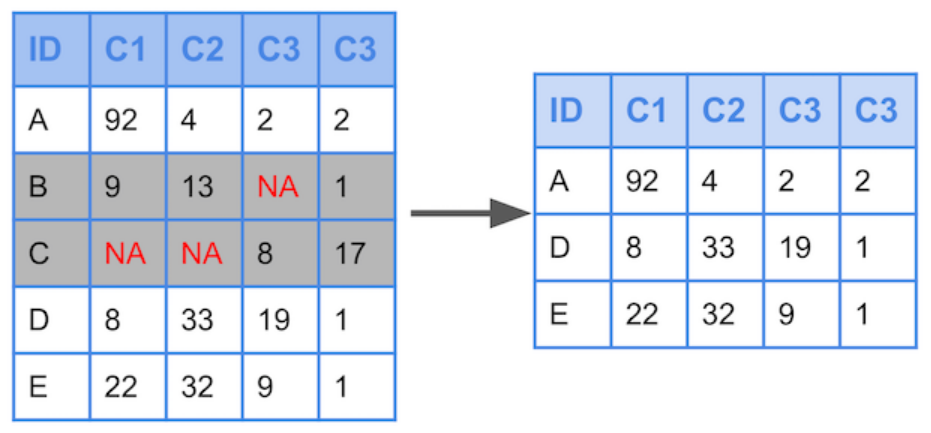

In [22]:
pd.isna(train)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,False,False,False,False,False,False,False,False,False,False,False,False
533,False,False,False,False,False,False,False,False,False,True,False,False
452,False,False,False,False,False,False,False,False,False,False,False,False
355,False,False,True,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
277,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
359,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
pd.isna(train).sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
pd.isna(train).sum().to_frame("Valor Vazio")

,Valor Vazio
Gender,12
Married,3
Dependents,15
Education,0
Self_Employed,28
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,20
Loan_Amount_Term,11
Credit_History,41


In [25]:
pd.isna(test).sum().to_frame("Valor Vazio")

,Valor Vazio
Gender,1
Married,0
Dependents,0
Education,0
Self_Employed,4
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,2
Loan_Amount_Term,3
Credit_History,9


In [26]:
print('Treino:',  train.shape)
print('Teste.:',  test.shape)

Treino: (491, 12)
Teste.: (123, 12)


In [27]:
train.dropna(how='any', inplace=True)
test = test.dropna(how='any')

In [28]:
print('Treino:',  train.shape)
print('Teste.:',  test.shape)

Treino: (375, 12)
Teste.: (105, 12)


In [29]:
train.count()

Gender               375
Married              375
Dependents           375
Education            375
Self_Employed        375
ApplicantIncome      375
CoapplicantIncome    375
LoanAmount           375
Loan_Amount_Term     375
Credit_History       375
Property_Area        375
Loan_Status          375
dtype: int64

In [30]:
test.count()

Gender               105
Married              105
Dependents           105
Education            105
Self_Employed        105
ApplicantIncome      105
CoapplicantIncome    105
LoanAmount           105
Loan_Amount_Term     105
Credit_History       105
Property_Area        105
Loan_Status          105
dtype: int64

## Transformando Colunas Categóricas em Numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="900" height="300"/>

É necessário tratar as colunas categóricas (dtype object)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 90 to 559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             375 non-null    object 
 1   Married            375 non-null    object 
 2   Dependents         375 non-null    object 
 3   Education          375 non-null    object 
 4   Self_Employed      375 non-null    object 
 5   ApplicantIncome    375 non-null    int64  
 6   CoapplicantIncome  375 non-null    float64
 7   LoanAmount         375 non-null    float64
 8   Loan_Amount_Term   375 non-null    float64
 9   Credit_History     375 non-null    float64
 10  Property_Area      375 non-null    object 
 11  Loan_Status        375 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 38.1+ KB


### Criando uma lista com as colunas categóricas

In [32]:
colunas_object = list(train.select_dtypes(include=['object']).columns)
colunas_object

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

### Vizualizando as classes de cada coluna categórica

In [33]:
train['Gender'].drop_duplicates()

90       Male
403    Female
Name: Gender, dtype: object

In [34]:
train['Married'].drop_duplicates()

90     Yes
403     No
Name: Married, dtype: object

In [35]:
train['Dependents'].drop_duplicates()

90      0
266     2
235     1
515    3+
Name: Dependents, dtype: object

In [36]:
train['Education'].drop_duplicates()

90         Graduate
403    Not Graduate
Name: Education, dtype: object

In [37]:
train['Self_Employed'].drop_duplicates()

90      No
493    Yes
Name: Self_Employed, dtype: object

In [38]:
train['Property_Area'].drop_duplicates()

90     Semiurban
452        Rural
144        Urban
Name: Property_Area, dtype: object

### Transformando as colunas categórias em numéricas com a técnica Dummie

In [39]:
#train = pd.get_dummies(train, columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])
#test = pd.get_dummies(test, columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])

train = pd.get_dummies( train, columns=colunas_object )
test  = pd.get_dummies( test,  columns=colunas_object )

In [40]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
90,2958,2900.0,131.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
452,3948,1733.0,149.0,360.0,0.0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
266,4708,1387.0,150.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
118,5568,2142.0,175.0,360.0,1.0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
144,11757,0.0,187.0,180.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [41]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
454,7085,0.0,84.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
52,4230,0.0,112.0,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
536,6133,3906.0,324.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
469,4333,2451.0,110.0,360.0,1.0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
55,2708,1167.0,97.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0


In [42]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [43]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="800" height="400"/>

Momento em que se separa as colunas de objetivo (alvo, target) das variáveis de análise (característica, features)

In [44]:
train_x = train.drop(columns=['Loan_Status'], axis=1)
train_y = train['Loan_Status']

In [45]:
test_x = test.drop(columns=['Loan_Status'], axis=1)
test_y = test['Loan_Status']

In [46]:
train_x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
90,2958,2900.0,131.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
452,3948,1733.0,149.0,360.0,0.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
266,4708,1387.0,150.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
118,5568,2142.0,175.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
144,11757,0.0,187.0,180.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [47]:
train_y.head()

90     1
452    0
266    1
118    0
144    1
Name: Loan_Status, dtype: int64

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="800" height="400"/>

In [48]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y) 
RF = RandomForestClassifier().fit(train_x,train_y)

## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="900" height="450"/>

**Erro do tipo 1**: Falso Positivo (Dar empréstimo para quem não paga)
```
precision_score(test_y, LR.predict(test_x))
```

73 / (73 + 15), tem que ser o maior possível, mais próximo de 1
<br><br>
**Erro do tipo 2**: Falso Negativo (Não dar empréstimo para quem paga)
```
recall_score(test_y, LR.predict(test_x))
```

73 / (73 + 3), tem que ser o maior possível
<br><br>
Neste caso, para uma seguradora, é mais interessante que ela não dê empréstimos para quem não pode pagar, assim a Acurácia, não é a melhor métrica, mas sim o melhor Erro do Tipo 1, o Falso Positivo, assim usamos a Precisão


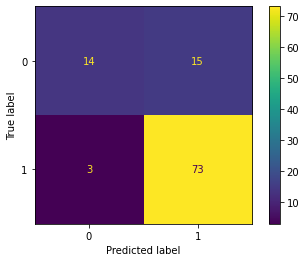

In [49]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show();

In [50]:
87/105

0.8285714285714286

In [51]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")

Acurácia LR: 0.8285714285714286 

Acurácia LDA: 0.8380952380952381 

Acurácia DT: 0.6285714285714286 

Acurácia KN: 0.638095238095238 

Acurácia SVM: 0.7238095238095238 

Acurácia RF: 0.8095238095238095 



In [52]:
metricas = {'Accuracy': [LR.score(test_x,test_y),
                         LDA.score(test_x,test_y),
                         DT.score(test_x,test_y),
                         KN.score(test_x,test_y),
                         SVM.score(test_x,test_y),
                         RF.score(test_x,test_y)],
            'Precision': [precision_score(test_y, LR.predict(test_x)),
                      precision_score(test_y, LDA.predict(test_x)),
                      precision_score(test_y, DT.predict(test_x)),
                      precision_score(test_y, KN.predict(test_x)),
                      precision_score(test_y, SVM.predict(test_x)),
                      precision_score(test_y, RF.predict(test_x))],
            'Recall' : [recall_score(test_y, RF.predict(test_x)),
                    recall_score(test_y, LDA.predict(test_x)),
                    recall_score(test_y, DT.predict(test_x)),
                    recall_score(test_y, KN.predict(test_x)),
                    recall_score(test_y, SVM.predict(test_x)),
                    recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, 
                     columns = ['Accuracy', 'Precision','Recall'], 
                     index=['LR','LDA','DT','KNN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.828571,0.829545,0.934211
LDA,0.838095,0.831461,0.973684
DT,0.628571,0.784615,0.671053
KNN,0.638095,0.720930,0.815789
SVM,0.723810,0.723810,1.000000
RF,0.809524,0.825581,0.934211


### Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="700" height="400"/>

Pesquisar: ROC curve, predict curve e recall curve.

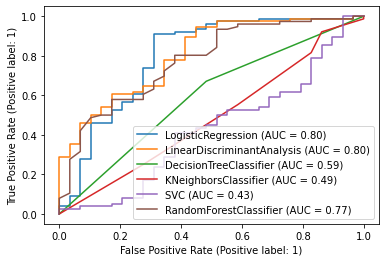

In [53]:
plot_roc_curve(LR,  test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT,  test_x, test_y, ax=plt.gca())
plot_roc_curve(KN,  test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF,  test_x, test_y, ax=plt.gca())
plt.show();

### Curva Precision Recall

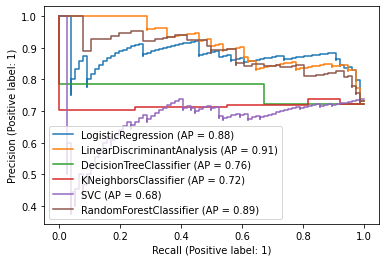

In [54]:
plot_precision_recall_curve(LR,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KN,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF,  test_x, test_y, ax=plt.gca())
plt.show();

## **Conclusão**

Para o problema de previsão de empréstimo, o modelo com melhor resultado é o modelode linear de **Análise de Discrininante Linear**.

## Analisando as correlações e indo além...

In [55]:
df.corr().style.applymap(color_corr)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [56]:
train_x.corr().style.applymap(color_corr)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.102939,0.487862,-0.015666,-0.095201,-0.025777,0.025777,-0.042186,0.042186,-0.119454,0.064311,-0.025017,0.161727,0.118959,-0.118959,-0.182838,0.182838,0.043251,0.004742,-0.047624
CoapplicantIncome,-0.102939,1.000000,0.264690,-0.013721,0.017731,-0.189640,0.189640,-0.167673,0.167673,-0.027943,0.008934,0.040954,-0.019580,0.086060,-0.086060,-0.020168,0.020168,-0.001075,0.030350,-0.031073
LoanAmount,0.487862,0.264690,1.000000,0.045960,-0.064006,-0.105657,0.105657,-0.200497,0.200497,-0.205559,0.071047,0.086883,0.150264,0.174380,-0.174380,-0.144310,0.144310,0.108384,0.001058,-0.107879
Loan_Amount_Term,-0.015666,-0.013721,0.045960,1.000000,-0.016826,0.065634,-0.065634,0.097022,-0.097022,0.103814,-0.104915,-0.012610,-0.024419,0.075802,-0.075802,0.001890,-0.001890,0.074637,0.000508,-0.074056
Credit_History,-0.095201,0.017731,-0.064006,-0.016826,1.000000,0.038606,-0.038606,-0.039285,0.039285,0.040266,-0.045921,0.002334,-0.012409,0.021718,-0.021718,0.037786,-0.037786,-0.047461,0.074760,-0.032398
Gender_Female,-0.025777,-0.189640,-0.105657,0.065634,0.038606,1.000000,-1.000000,0.345507,-0.345507,0.140753,0.055104,-0.152039,-0.116149,0.042061,-0.042061,-0.016415,0.016415,-0.044794,0.070454,-0.030466
Gender_Male,0.025777,0.189640,0.105657,-0.065634,-0.038606,-1.000000,1.000000,-0.345507,0.345507,-0.140753,-0.055104,0.152039,0.116149,-0.042061,0.042061,0.016415,-0.016415,0.044794,-0.070454,0.030466
Married_No,-0.042186,-0.167673,-0.200497,0.097022,-0.039285,0.345507,-0.345507,1.000000,-1.000000,0.380142,-0.123066,-0.251336,-0.161822,-0.038580,0.038580,0.060387,-0.060387,0.036565,-0.032410,-0.001704
Married_Yes,0.042186,0.167673,0.200497,-0.097022,0.039285,-0.345507,0.345507,-1.000000,1.000000,-0.380142,0.123066,0.251336,0.161822,0.038580,-0.038580,-0.060387,0.060387,-0.036565,0.032410,0.001704
Dependents_0,-0.119454,-0.027943,-0.205559,0.103814,0.040266,0.140753,-0.140753,0.380142,-0.380142,1.000000,-0.518575,-0.532823,-0.336838,0.016763,-0.016763,0.108615,-0.108615,0.067135,-0.000468,-0.065633


In [57]:
train_x.drop(['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes'], axis=1, inplace=True)
test_x.drop(['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes'], axis=1, inplace=True)

In [58]:
train_x.dropna(how='any', inplace=True)
test_x.dropna(how='any', inplace=True)

In [59]:
train_x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
90,2958,2900.0,131.0,360.0,1.0,0,0,1,0,0,0,1,1,0,1,0
452,3948,1733.0,149.0,360.0,0.0,0,0,1,0,0,0,1,1,1,0,0
266,4708,1387.0,150.0,360.0,1.0,0,0,0,0,1,0,1,1,0,1,0
118,5568,2142.0,175.0,360.0,1.0,0,0,1,0,0,0,1,1,1,0,0
144,11757,0.0,187.0,180.0,1.0,0,0,0,0,1,0,1,1,0,0,1


In [60]:
train_x.corr().style.applymap(color_corr)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.102939,0.487862,-0.015666,-0.095201,-0.025777,-0.042186,-0.119454,0.064311,-0.025017,0.161727,0.118959,-0.182838,0.043251,0.004742,-0.047624
CoapplicantIncome,-0.102939,1.000000,0.264690,-0.013721,0.017731,-0.189640,-0.167673,-0.027943,0.008934,0.040954,-0.019580,0.086060,-0.020168,-0.001075,0.030350,-0.031073
LoanAmount,0.487862,0.264690,1.000000,0.045960,-0.064006,-0.105657,-0.200497,-0.205559,0.071047,0.086883,0.150264,0.174380,-0.144310,0.108384,0.001058,-0.107879
Loan_Amount_Term,-0.015666,-0.013721,0.045960,1.000000,-0.016826,0.065634,0.097022,0.103814,-0.104915,-0.012610,-0.024419,0.075802,0.001890,0.074637,0.000508,-0.074056
Credit_History,-0.095201,0.017731,-0.064006,-0.016826,1.000000,0.038606,-0.039285,0.040266,-0.045921,0.002334,-0.012409,0.021718,0.037786,-0.047461,0.074760,-0.032398
Gender_Female,-0.025777,-0.189640,-0.105657,0.065634,0.038606,1.000000,0.345507,0.140753,0.055104,-0.152039,-0.116149,0.042061,-0.016415,-0.044794,0.070454,-0.030466
Married_No,-0.042186,-0.167673,-0.200497,0.097022,-0.039285,0.345507,1.000000,0.380142,-0.123066,-0.251336,-0.161822,-0.038580,0.060387,0.036565,-0.032410,-0.001704
Dependents_0,-0.119454,-0.027943,-0.205559,0.103814,0.040266,0.140753,0.380142,1.000000,-0.518575,-0.532823,-0.336838,0.016763,0.108615,0.067135,-0.000468,-0.065633
Dependents_1,0.064311,0.008934,0.071047,-0.104915,-0.045921,0.055104,-0.123066,-0.518575,1.000000,-0.219461,-0.138738,0.018017,-0.101063,-0.097818,0.011104,0.084595
Dependents_2,-0.025017,0.040954,0.086883,-0.012610,0.002334,-0.152039,-0.251336,-0.532823,-0.219461,1.000000,-0.142549,-0.023932,-0.032748,-0.033859,-0.019914,0.054434


In [69]:
test_x.corr().style.applymap(color_corr)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.197508,0.641719,0.022068,0.226799,-0.099784,-0.011253,-0.137565,0.114912,0.018357,0.072032,0.244900,-0.047431,0.061911,-0.029256,-0.028527
CoapplicantIncome,-0.197508,1.000000,0.034385,0.011672,-0.070086,-0.092690,0.035047,0.051636,-0.065387,0.011875,-0.024242,0.061912,0.038265,0.003294,-0.095435,0.096769
LoanAmount,0.641719,0.034385,1.000000,0.071699,0.056506,-0.072094,-0.114485,-0.062835,0.163207,-0.055690,-0.016867,0.167684,0.003226,-0.005814,0.064570,-0.062046
Loan_Amount_Term,0.022068,0.011672,0.071699,1.000000,0.213689,0.173421,0.145440,0.173508,-0.087791,0.019989,-0.209849,0.193413,0.179829,-0.115736,0.137423,-0.033287
Credit_History,0.226799,-0.070086,0.056506,0.213689,1.000000,-0.247594,0.008191,-0.096077,0.160128,0.173097,-0.238416,0.178611,-0.039736,0.069568,-0.055556,-0.008309
Gender_Female,-0.099784,-0.092690,-0.072094,0.173421,-0.247594,1.000000,0.363536,0.356821,-0.178410,-0.192860,-0.147576,0.118703,0.061490,-0.111421,0.247594,-0.152754
Married_No,-0.011253,0.035047,-0.114485,0.145440,0.008191,0.363536,1.000000,0.525314,-0.283315,-0.306261,-0.165998,0.139990,-0.175762,0.047440,0.065530,-0.113936
Dependents_0,-0.137565,0.051636,-0.062835,0.173508,-0.096077,0.356821,0.525314,1.000000,-0.500000,-0.540495,-0.413585,0.011290,-0.054084,-0.041774,0.160128,-0.127731
Dependents_1,0.114912,-0.065387,0.163207,-0.087791,0.160128,-0.178410,-0.283315,-0.500000,1.000000,-0.166306,-0.127257,0.004516,0.031814,-0.116968,-0.034313,0.147688
Dependents_2,0.018357,0.011875,-0.055690,0.019989,0.173097,-0.192860,-0.306261,-0.540495,-0.166306,1.000000,-0.137563,0.032341,-0.042989,0.034433,-0.129823,0.103017


## Para pensar e testar!

Após remover as colunas altamente correlacionadas, será que se re-executar o treinamento dos modelos, os resultados serão diferentes?

E se forem diferentes, são melhores?

**Refazendo os testes após removre as colunas altamente correlacionadas**

In [65]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y) 
RF = RandomForestClassifier().fit(train_x,train_y)

**Medindo a eficiencia de predição dos modelos acima**

In [64]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")

Acurácia LR: 0.8285714285714286 

Acurácia LDA: 0.8380952380952381 

Acurácia DT: 0.6476190476190476 

Acurácia KN: 0.638095238095238 

Acurácia SVM: 0.7238095238095238 

Acurácia RF: 0.7714285714285715 






**PRECISÃO DAS PREDIÇÕES DO MODELO ALTAMENTE CORRELACIONADO**

Acurácia LR: 0.8285714285714286                                            
                                   
Acurácia LDA: 0.8380952380952381 

Acurácia DT: 0.6476190476190476 

Acurácia KN: 0.638095238095238 

Acurácia SVM: 0.7238095238095238 

Acurácia RF: 0.7714285714285715               

PRECISÃO DAS PREDIÇÕES DO MODELO COM AS CORRELAÇÕES TRATADAS


Acurácia LR: 0.8285714285714286 

Acurácia LDA: 0.8380952380952381 

Acurácia DT: 0.6476190476190476 

Acurácia KN: 0.638095238095238 

Acurácia SVM: 0.7238095238095238 

Acurácia RF: 0.7714285714285715 




**MATRIZ CONFUSÃO DOS DADOS COM AS CORRELAÇOES TRATADAS**

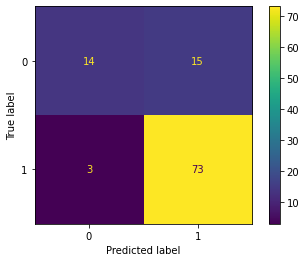

In [67]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show();

**TABELA DAS MÉTRICAS DE EFICIÊNCIA DE PREDIÇÃO DOS NOVOS DADOS**

In [68]:
metricas = {'Accuracy': [LR.score(test_x,test_y),
                         LDA.score(test_x,test_y),
                         DT.score(test_x,test_y),
                         KN.score(test_x,test_y),
                         SVM.score(test_x,test_y),
                         RF.score(test_x,test_y)],
            'Precision': [precision_score(test_y, LR.predict(test_x)),
                      precision_score(test_y, LDA.predict(test_x)),
                      precision_score(test_y, DT.predict(test_x)),
                      precision_score(test_y, KN.predict(test_x)),
                      precision_score(test_y, SVM.predict(test_x)),
                      precision_score(test_y, RF.predict(test_x))],
            'Recall' : [recall_score(test_y, RF.predict(test_x)),
                    recall_score(test_y, LDA.predict(test_x)),
                    recall_score(test_y, DT.predict(test_x)),
                    recall_score(test_y, KN.predict(test_x)),
                    recall_score(test_y, SVM.predict(test_x)),
                    recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, 
                     columns = ['Accuracy', 'Precision','Recall'], 
                     index=['LR','LDA','DT','KNN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.828571,0.829545,0.894737
LDA,0.838095,0.831461,0.973684
DT,0.647619,0.782609,0.710526
KNN,0.638095,0.720930,0.815789
SVM,0.723810,0.723810,1.000000
RF,0.771429,0.809524,0.894737


**Curva ROC DAS MÉTRICAS DE EFICIÊNCIA DE PREDIÇÃO DOS NOVOS DADOS**

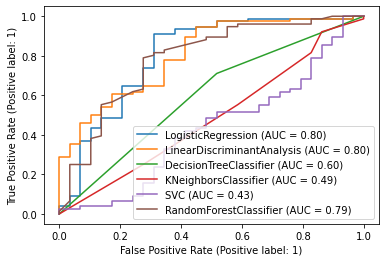

In [70]:
plot_roc_curve(LR,  test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT,  test_x, test_y, ax=plt.gca())
plot_roc_curve(KN,  test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF,  test_x, test_y, ax=plt.gca())
plt.show();

**Curva Precision Recall DAS MÉTRICAS DE EFICIÊNCIA DE PREDIÇÃO DOS NOVOS DADOS**

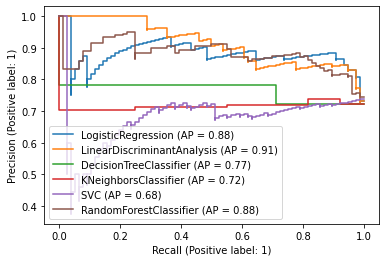

In [71]:
plot_precision_recall_curve(LR,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KN,  test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF,  test_x, test_y, ax=plt.gca())
plt.show();



> **Conclusão**



Como observado nos dados acima a correlação entre as colunas não surtiu um efeito perceptivel na habilidade dos modelos em predizer acontecimentos. Foi observado uma conservação dos valores em ambos os casos.